<a href="https://colab.research.google.com/github/seominjae1/ai-class/blob/main/git/ai_class_week1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/diabetes.csv", index_col=0)
#데이터 확인
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


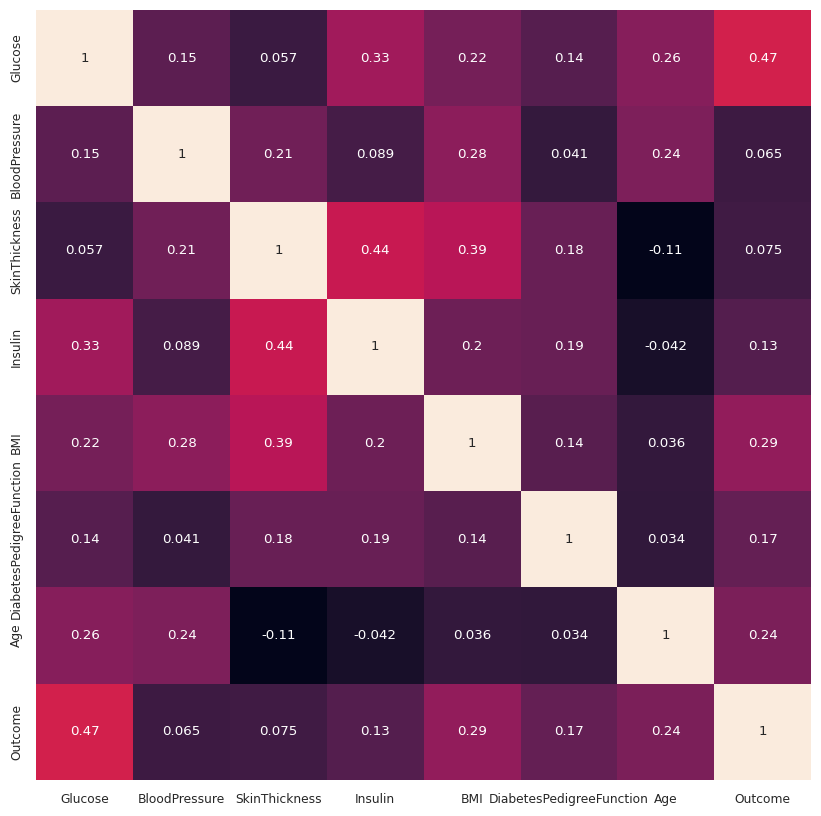

In [3]:
#상관 관계 행렬

df_corr=df.corr()
#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()
#Outcome과 관계가 높은 것은 Glucose

In [4]:
#Outcome삭제
X = df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [5]:
y = df['Outcome']
y.head()

,Outcome
Pregnancies,
6,1
1,0
8,1
1,0
0,1


In [6]:
Y = pd.get_dummies(y).values

In [7]:
X = X.values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((614, 7), (614, 2), (154, 7), (154, 2))

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2903 - mse: 0.2903 - val_loss: 0.2547 - val_mse: 0.2547
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2559 - mse: 0.2559 - val_loss: 0.2534 - val_mse: 0.2534
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2535 - mse: 0.2535 - val_loss: 0.2510 - val_mse: 0.2510
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2519 - mse: 0.2519 - val_loss: 0.2508 - val_mse: 0.2508
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2536 - mse: 0.2536 - val_loss: 0.2524 - val_mse: 0.2524
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2528 - mse: 0.2528 - val_loss: 0.2505 - val_mse: 0.2505
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2518 - mse: 0.2518 - val_loss: 0.2510 - val_mse: 0.2510
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2522 - mse: 0.2522 - val_loss: 0.2571 - val_mse: 0.2571
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2524 - mse:

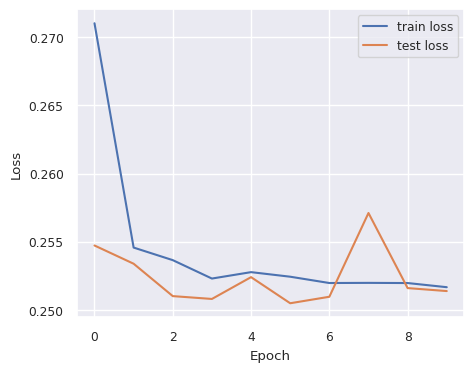

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2514 - mse: 0.2514 


[0.2513783574104309, 0.2513783574104309]